# Homework 2

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive, FloatSlider
from datetime import datetime

## Задача

Дана СЛАУ второго порядка, нужно отобразить на графике линии и точку их пересечения

$$a_{11}x + a_{12}y = b_1$$
$$a_{21}x + a_{22}y = b_2$$

ДЗ для заинтересованных - сделать виджет для управления коэффициентами системы и автоматической перестройки графиков

[Пример с кодом](https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets)

In [2]:
def plot_two_lines(a11, a12, a21, a22, b1, b2):
    if (a11 == 0 and a12 == 0) or (a21 == 0 and a22 == 0):
        print('Not a valid line system')
        return
    plt.figure(figsize=(6, 6))
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xticks(np.arange(-10, 11, 1))
    plt.yticks(np.arange(-10, 11, 1))
    if a11 == 0:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, b1 / a12 * np.ones(100))
    elif a12 == 0:
        y = np.linspace(-10, 10, 100)
        plt.plot(b1 / a11  * np.ones(100), y)
    else:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, (b1 - a11 * x) / a12)
    if a21 == 0:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, b2 / a22  * np.ones(100))
    elif a22 == 0:
        y = np.linspace(-10, 10, 100)
        plt.plot(b2 / a21 * np.ones(100), y)
    else:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, (b2 - a21 * x) / a22)

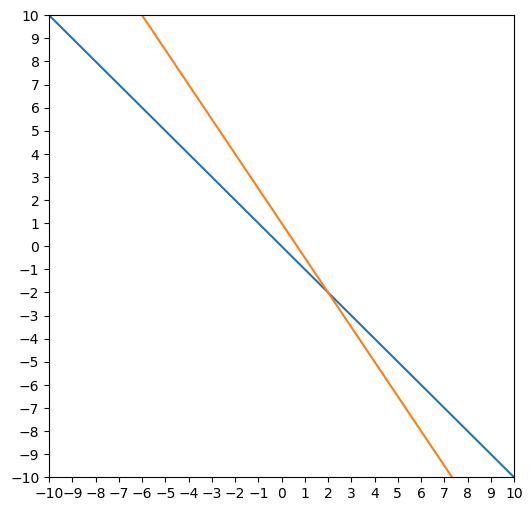

In [3]:
plot_two_lines(1, 1, 3, 2, 0, 2)

In [4]:
FS = FloatSlider(value = 1, min = -5, max= 5, step = 0.5)
interactive_plot = interactive(plot_two_lines, a11 = FloatSlider(value = 1, min = -5, max= 5, step = 0.2), 
                               a12 = FloatSlider(value = -3.5, min = -5, max= 5, step = 0.2), 
                               a21 = FloatSlider(value = 1, min = -5, max= 5, step = 0.2),
                               a22 = FloatSlider(value = 1, min = -5, max= 5, step = 0.2),
                               b1 = FloatSlider(value = 0, min = -5, max= 5, step = 0.2),
                               b2 = FloatSlider(value = 1, min = -5, max= 5, step = 0.2))

In [5]:
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a11', max=5.0, min=-5.0, step=0.2), FloatSlider(valu…

## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [6]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [7]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [8]:
df['Complain'].value_counts() # видим, что 1 - жалоба, 0 - её отсутсвие

Complain
0    2219
1      21
Name: count, dtype: int64

In [9]:
number_of_compains = df.Complain.sum()
number_of_compains

21

In [10]:
df['MntFruits'].sample(5)

163      12
1507    104
1993     33
418     114
948       2
Name: MntFruits, dtype: int64

In [11]:
cur_year = datetime.now().year
df['years'] = df['Year_Birth'].apply(lambda x: cur_year - x) # давайте посчитаем возраст каждого человека в годах

In [12]:
purchases = df.filter(regex="Mnt*")

In [13]:
customers = df[purchases.sum(axis=1) > 0]
df.shape, customers.shape # как видим, в датасете все покупали что-то 

((2240, 30), (2240, 30))

In [14]:
mean_age_customers = customers['years'].mean()
mean_age = df['years'].mean()
mean_age, mean_age_customers 

(55.19419642857143, 55.19419642857143)


### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

In [15]:
cols = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
        'Recency', 'NumWebPurchases', 'NumStorePurchases', 'years']
len(cols)

9

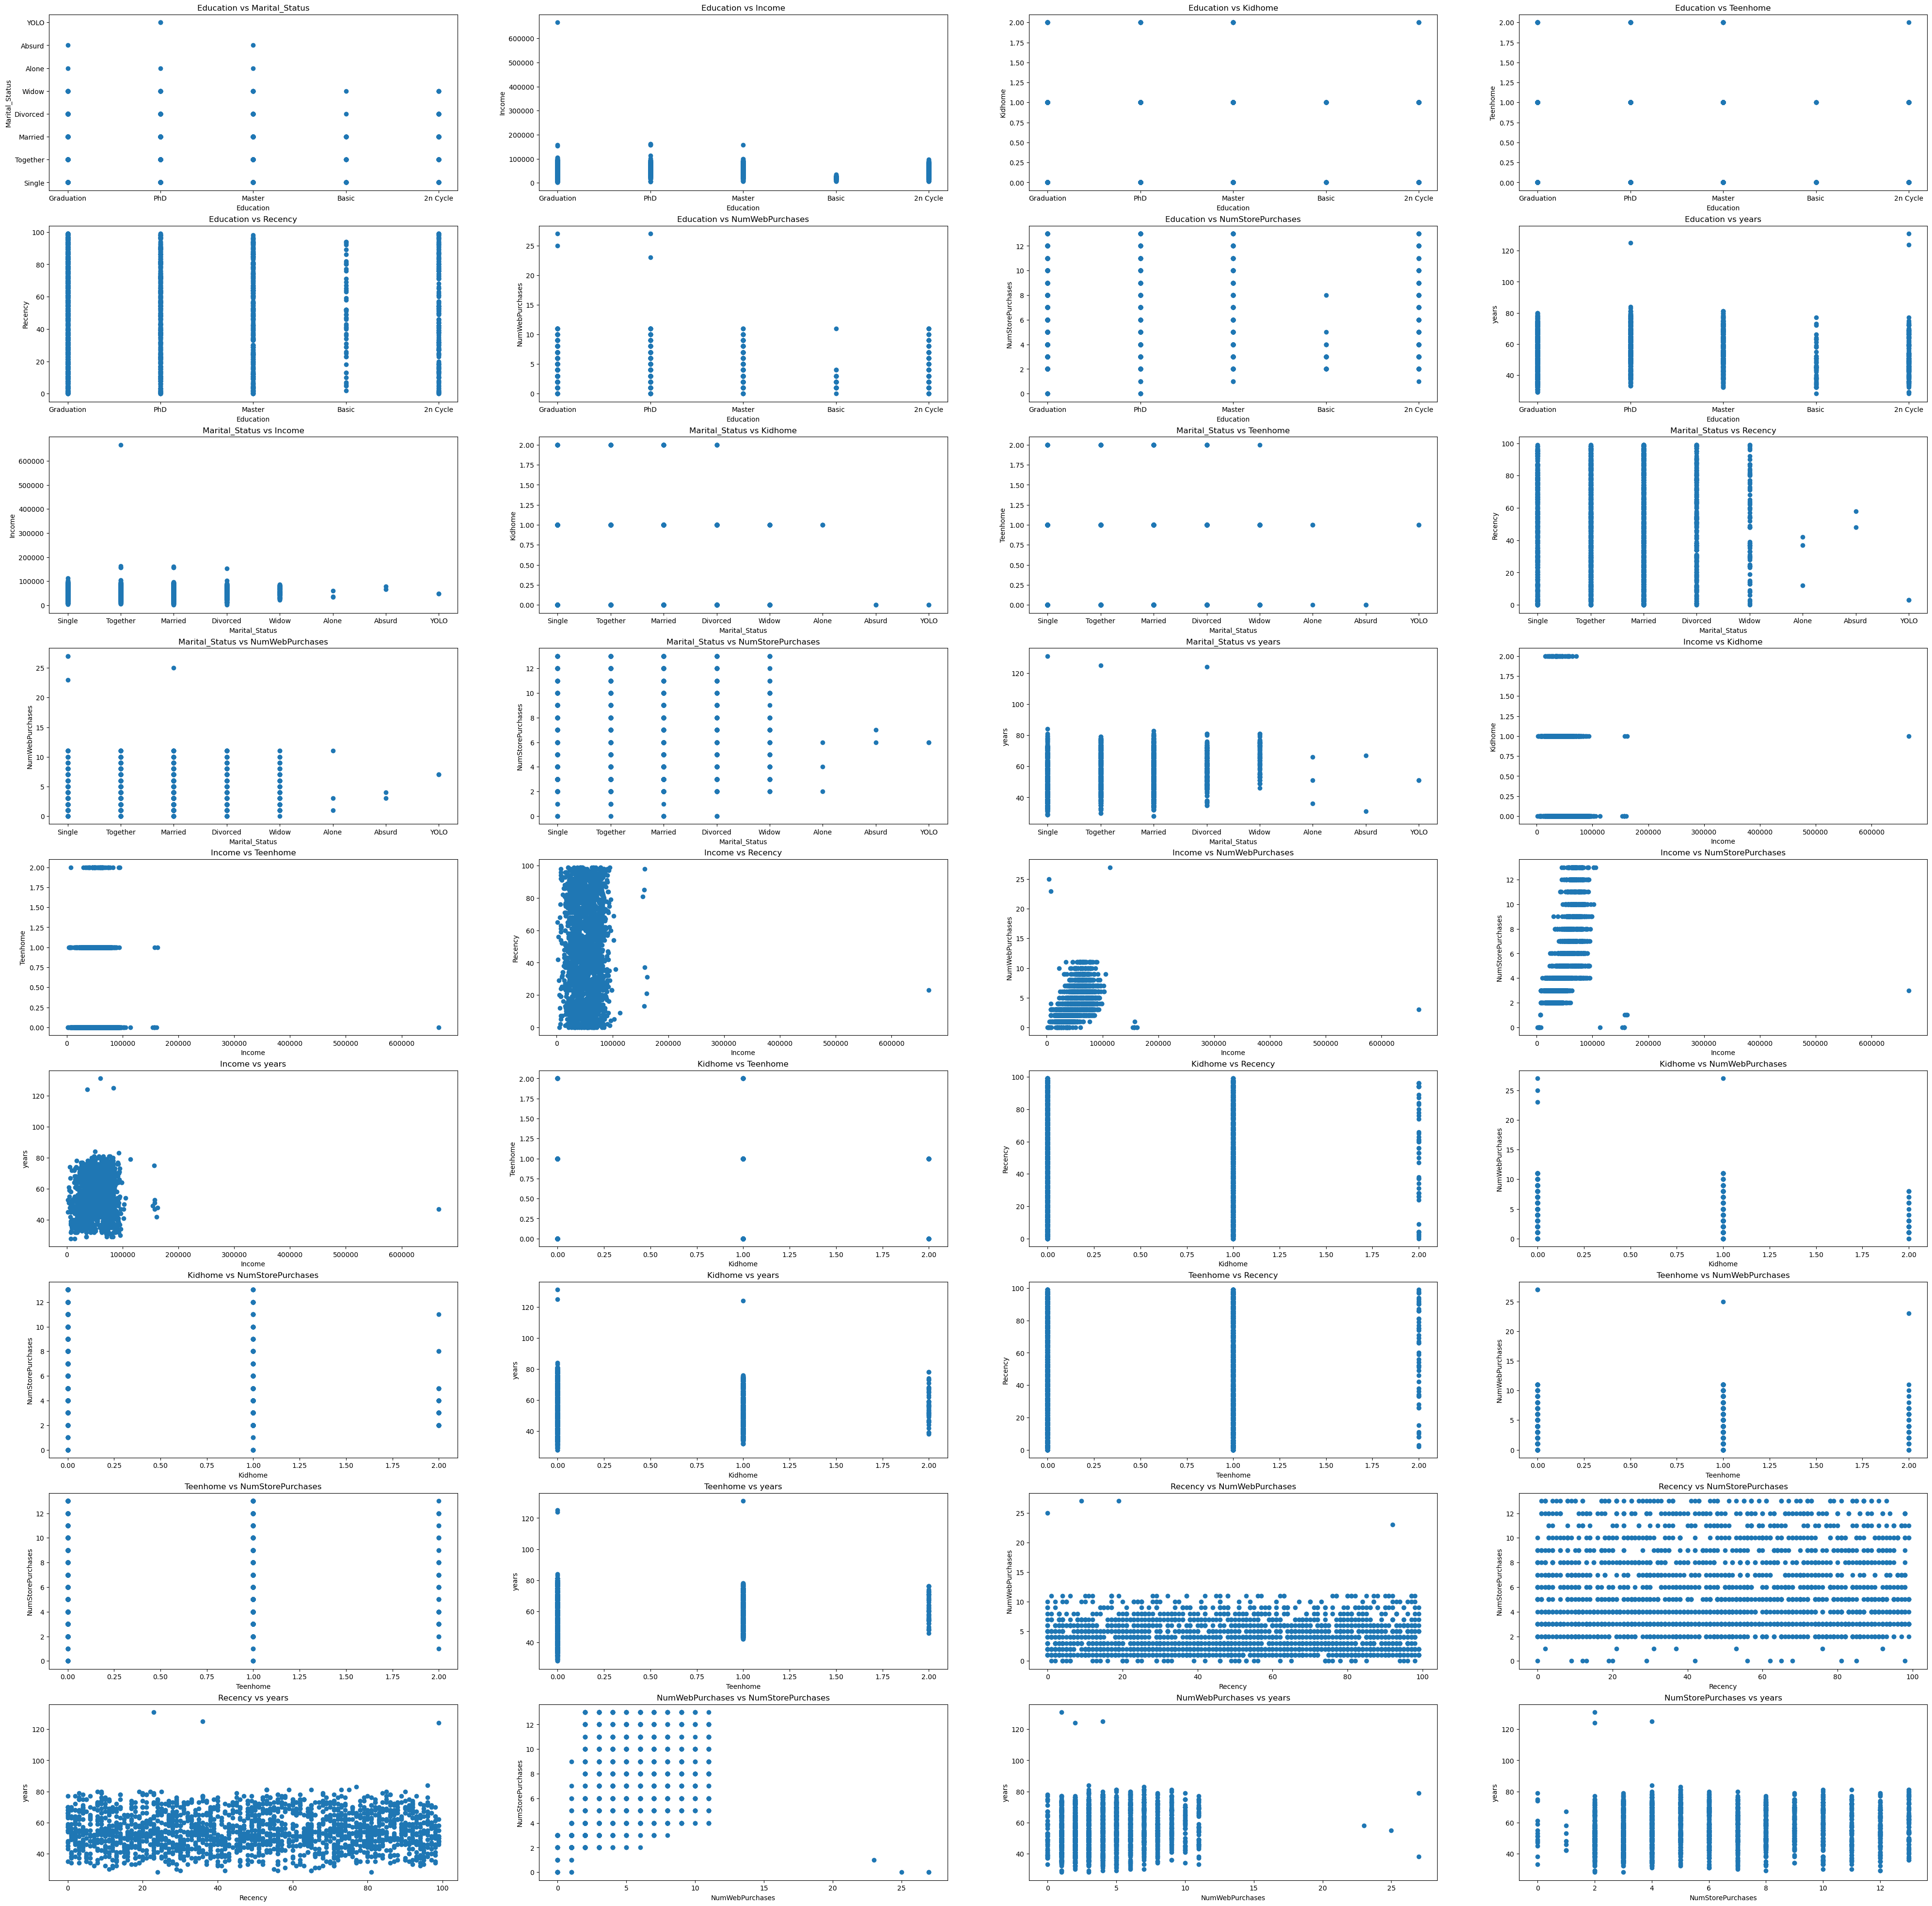

In [16]:
fig, axes = plt.subplots(9, 4, figsize=(50, 50))
x, y = 0, 0
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols[i + 1:]):
        axes[x, y].scatter(df[col1], df[col2])
        axes[x, y].set_title(col1 + " vs " + col2)
        axes[x, y].set_xlabel(col1)
        axes[x, y].set_ylabel(col2)
        y += 1
        if y == 4:
            y = 0
            x += 1
plt.show()

Как видим, самые понятные зависимости - между доходом и числом покупок (в среднем, чем выше доход, тем больше покупали).
Также интересно люди разных возрастов почти одинаково покупают в онлайн. Можно увидеть несколько "выбросов" и на графике сравнения онлайн и офлайн покупок (люди, которые покупают только онлайн). Вдовы и одиночки в среднем зарабатывают меньше остальных.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

Предлагаю считать ЦА тех людей, которые платежеспособности (зарабатывают выше медианных значений), входят в две трети самых активных покупателей и совершили хотя бы одну офлайн покупку

In [17]:
target = df[(purchases.sum(axis=1) > purchases.sum(axis=1).quantile(0.33)) & df['years'].between(20, 50) 
            & (df['NumStorePurchases'] > 0) & (df['Income'] > df['Income'].median())]
target.shape

(327, 30)

In [18]:
target.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,years
846,10343,1991,2n Cycle,Single,61618.0,0,0,29.09.2012,27,605,...,0,0,0,0,0,0,3,11,0,33
1500,4093,1975,Master,Together,53253.0,1,1,11.02.2013,61,216,...,0,0,0,0,0,0,3,11,0,49
2190,4418,1983,Master,Single,89616.0,0,0,25.02.2013,36,671,...,0,0,0,0,0,0,3,11,1,41


In [19]:
df.Income.mean(), target.Income.mean()

(52247.25135379061, 71667.91437308869)